In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from dmutils import plot_decision_tree
from dmutils import classification_summary, lift_chart, regression_summary

## Problems

**1.Competitive Auctions on eBay.com.** The file `eBayAuctions.csv` contains information on 1972 auctions that transacted on eBay.com during May - June 2004. The goal is to use these data to build a model that will classify auctions as competitive or noncompetitive. A competitive auction is defined as an auction with at least two bids placed on the item auctioned. The data include variables that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close). In addition, we have the price at which the auction closed. The task is to predict whether or not the auction will be competitive.

**Data Preprocessing.** Convert variable *Duration* into a categorical variable. Split the data into training (60%) and validation (40%) datasets.

In [2]:
ebay_df = pd.read_csv("../datasets/eBayAuctions.csv")

predictors = ["Category", "currency", "Duration", "sellerRating", "endDay", "ClosePrice",
              "OpenPrice"]

ebay_df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [3]:
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [4]:
X = pd.get_dummies(ebay_df[predictors], columns=["Category", "Duration",
                                                 "currency", "endDay"], drop_first=True)
y = ebay_df["Competitive?"]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [5]:
pd.get_dummies(ebay_df[predictors], columns=["Category"])

,currency,Duration,sellerRating,endDay,ClosePrice,OpenPrice,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,...,Category_Electronics,Category_EverythingElse,Category_Health/Beauty,Category_Home/Garden,Category_Jewelry,Category_Music/Movie/Game,Category_Photography,Category_Pottery/Glass,Category_SportingGoods,Category_Toys/Hobbies
0,US,5,3249,Mon,0.01,0.01,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,US,5,3249,Mon,0.01,0.01,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,US,5,3249,Mon,0.01,0.01,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,US,5,3249,Mon,0.01,0.01,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,US,5,3249,Mon,0.01,0.01,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,US,5,2992,Sun,359.95,359.95,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1968,US,5,21,Sat,610.00,300.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1969,US,5,1400,Mon,549.00,549.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1970,US,7,57,Fri,820.00,650.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**a.** Fit a classification tree using all predictors. To avoid overfitting, set the minimum number of records in a terminal node to 50 and the maximum tree depth to 7. Write down the results in terms of rules. (Note: If you had to slightly reduce the number of predictors due to software limitations, or for clarity of presentation, which would be a good variable to choose?)

In [6]:
# use max_depth to control tree size (None = full tree)
class_tree = DecisionTreeClassifier(min_samples_split=50, max_depth=7)
class_tree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=7, min_samples_split=50)

Classes: 0, 1


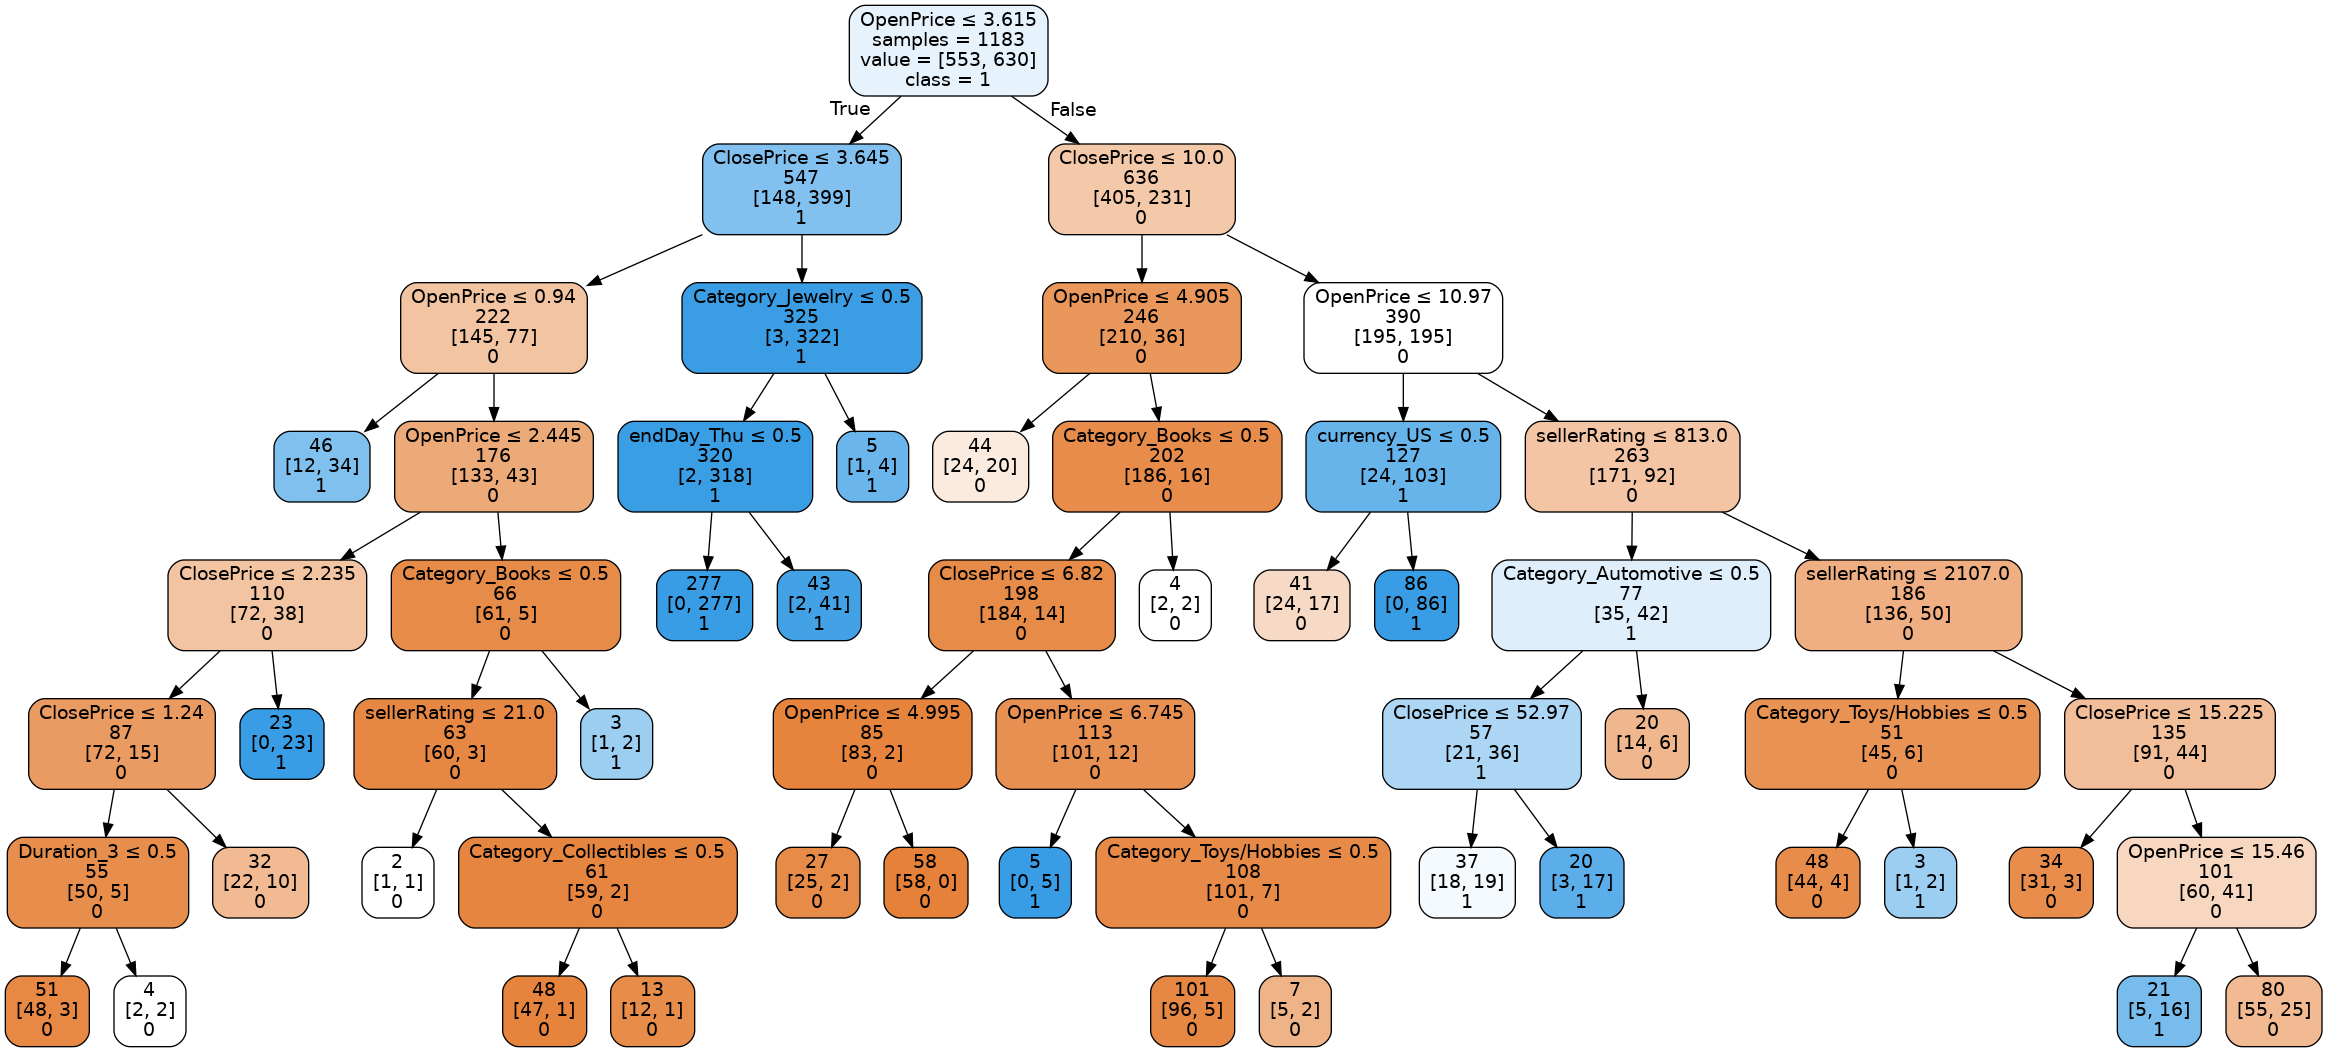

In [7]:
print("Classes: {}".format(", ".join(str(i) for i in class_tree.classes_)))

plot_decision_tree(class_tree, feature_names=train_X.columns,
                   class_names=class_tree.classes_)

The *terminal nodes* are colored orange or blue corresponding to a noncompetitive (0) or competitive (1) classification. The condition at the top of each splitting node gives the predictor and its splitting value for the split (e.g. `OpenPrice`≤ 3.615 in the top node). Besides this, a classification tree provides easily understandable classification rules (if the trees are not too large). The parent node rule is:

    IF (OpenPrice ≤ 3.615) THEN Competitive (Class = 1)

Each terminal node is equivalent to a classification rule. The above tree gives us the first three branches in terms of Rules:

i.   IF (OpenPrice ≤ 3.615) AND (ClosePrice ≤ 3.645) THEN Competitive (Class = 1)

ii.  IF (OpenPrice > 3.615) AND (ClosePrice ≤ 10.00) THEN Non-competitive (Class = 0) 

iii. IF (OpenPrice ≤ 3.615) AND (ClosePrice ≤ 3.645) AND (OpenPrice ≤ 0.94) THEN Non-competitive (Class = 0)

**b.** Is this model practical for predicting the outcome of a new auction?

No, this model isn't practical for predicting the outcome of a new variable because it includes the `ClosePrice` variable - this variable is only available when the auction ends. To be practical we need to avoid data [leakage](https://en.wikipedia.org/wiki/Leakage_(machine_learning)).

**c.** Describe the interesting and uninteresting information that these rules provide.

The interesting information that these rules provide is that the first splits are on `OpenPrice` and `ClosePrice`, such that these variables are the most relevant in the decision tree.

Some uninteresting information are:

- `Category_Books` and `EndDay_Monday` are only important if `ClosePrice` ≤ 3.645 AND `OpenPrice` > 2.445

- `SellerRating` is important if `OpenPrice` is > 10.97. 

**d.** Fit another classification tree (using a tree with a minimum number of records per terminal node = 50 and maximum depth = 7), this time only with predictors that can be used for predicting the outcome of a new auction. Describe the resulting tree in terms of rules. Make sure to report the smallest set of rules required for classification.

In [8]:
# Assuming that we cannot know the auction end day and
# closed price, the following are the valid predictors:
predictors = ["Category", "currency", "sellerRating", "OpenPrice"]
outcome = "Competitive?"

X = pd.get_dummies(ebay_df[predictors],
                   columns=["Category", "currency"],
                   drop_first=True)
y = ebay_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# use max_depth to control tree size (None = full tree)
class_tree = DecisionTreeClassifier(min_samples_split=50, max_depth=7)
class_tree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=7, min_samples_split=50)

Classes: 0, 1


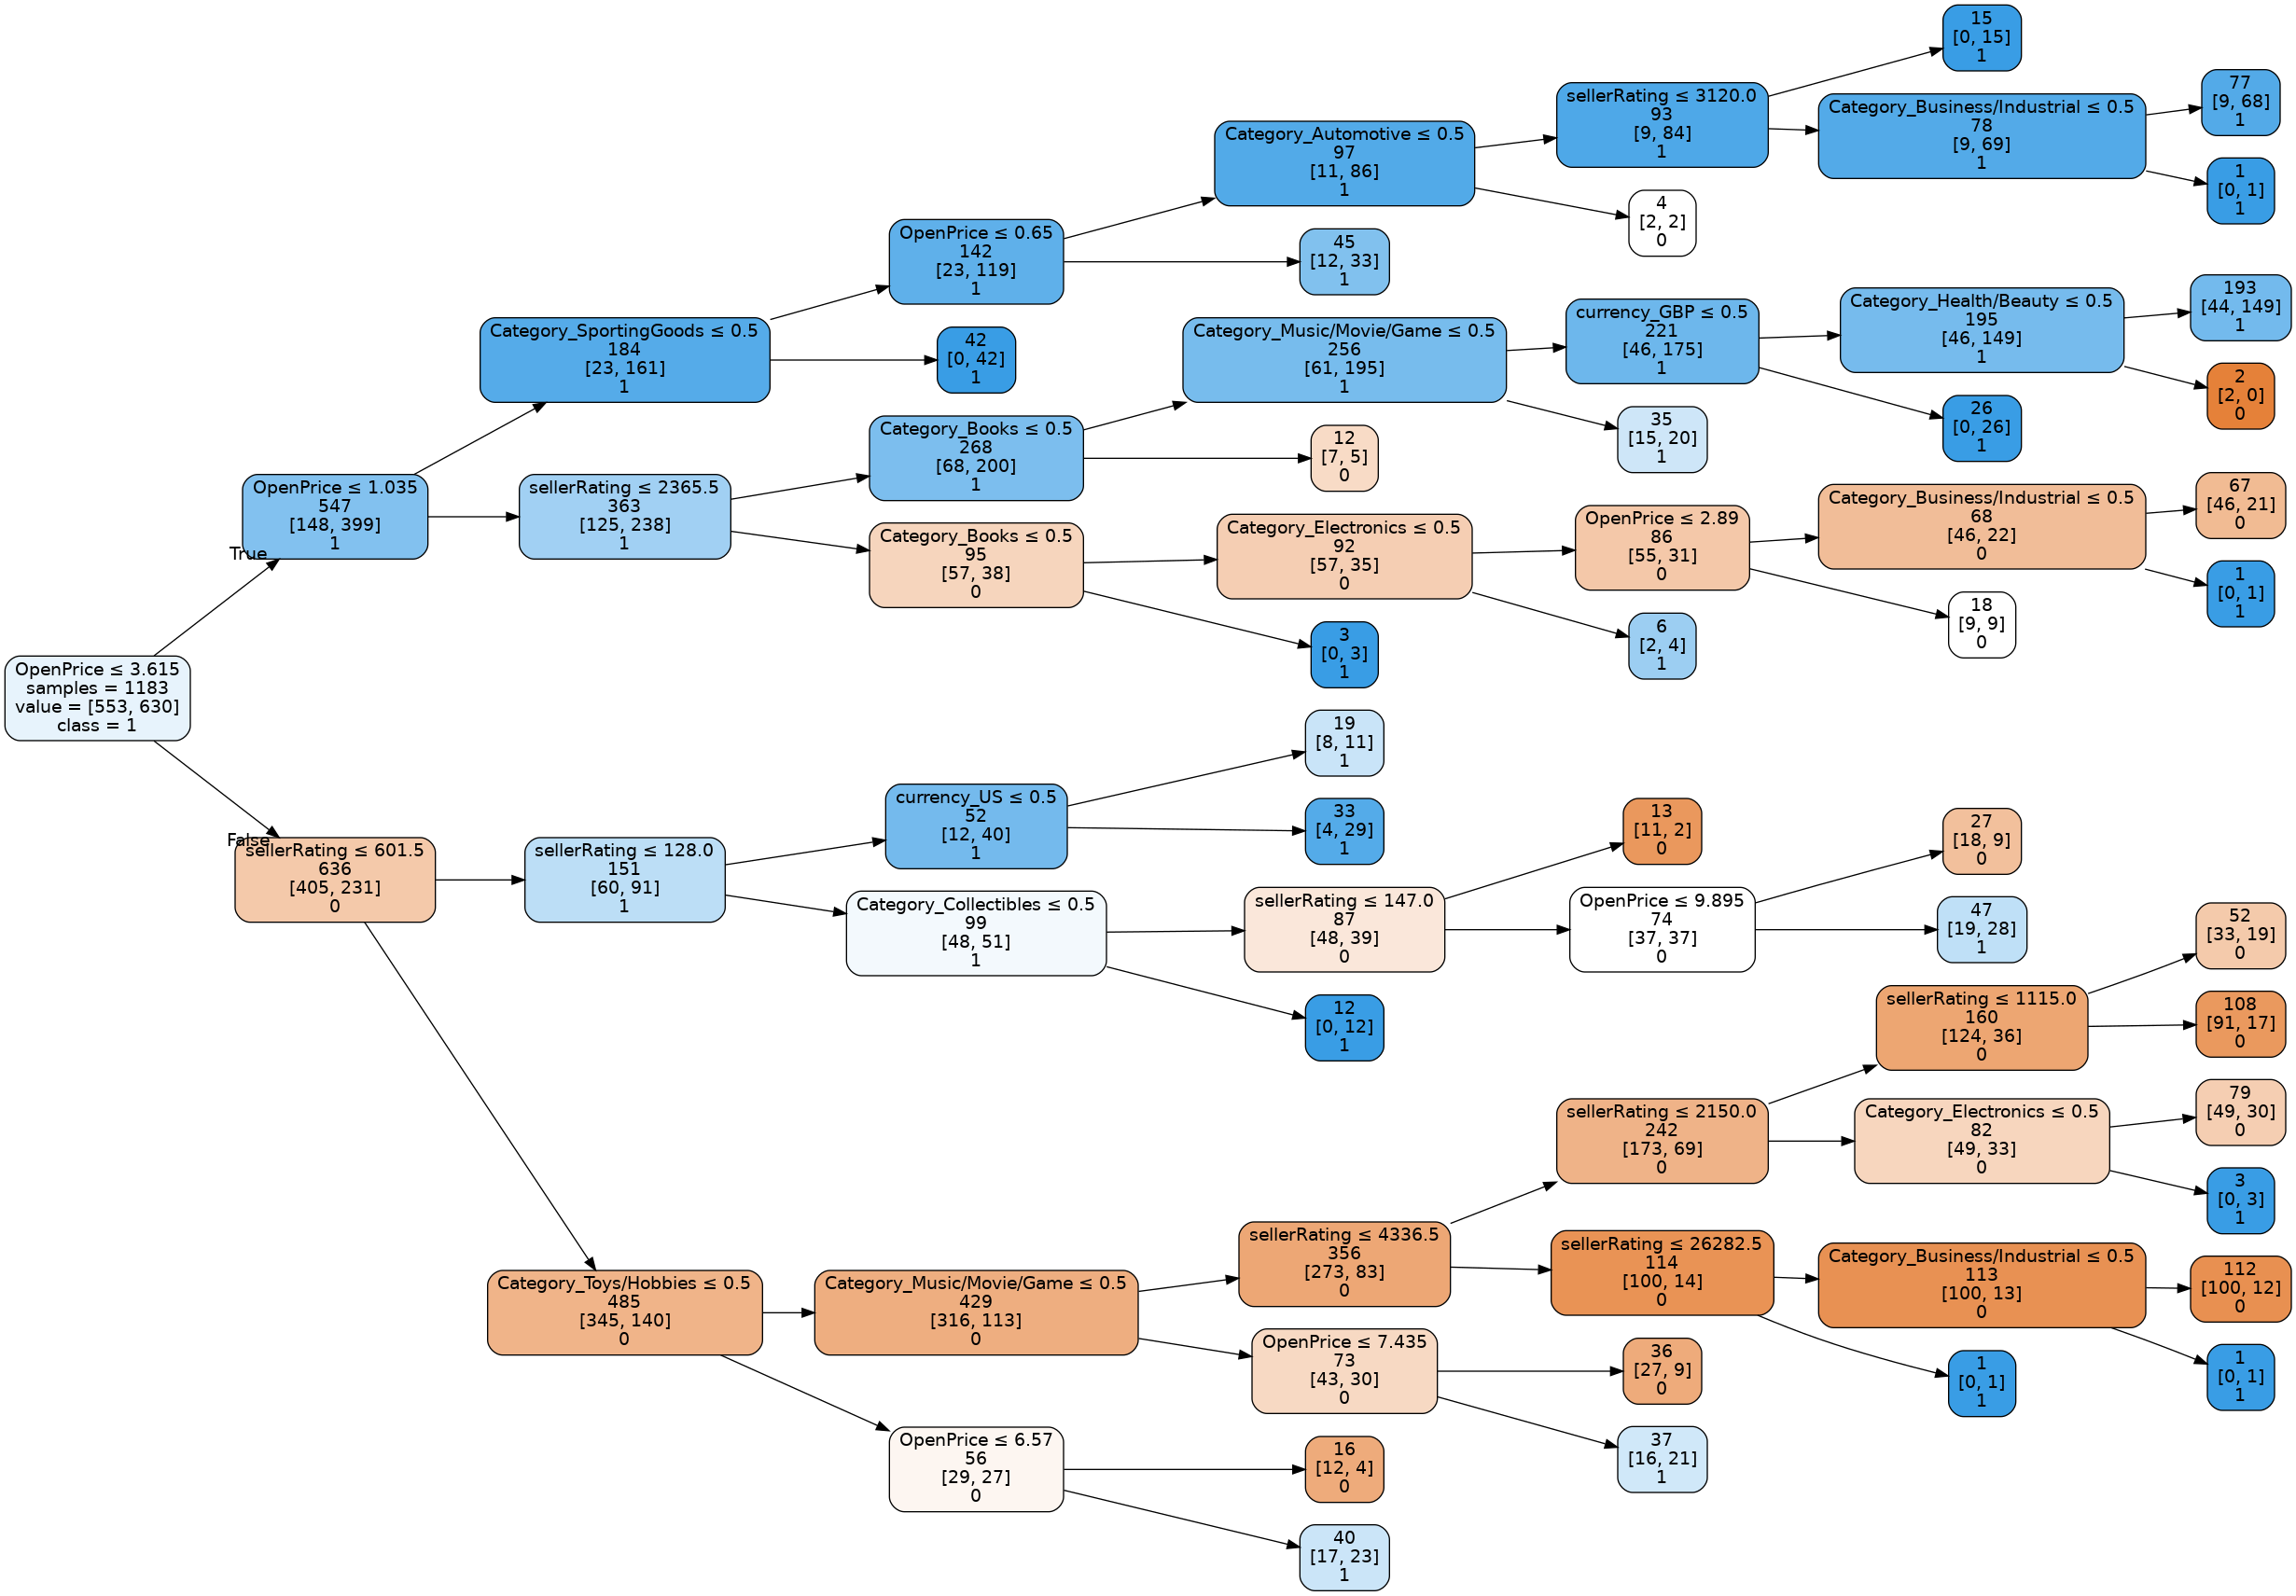

In [9]:
print("Classes: {}".format(", ".join(str(i) for i in class_tree.classes_)))

plot_decision_tree(class_tree, feature_names=train_X.columns,
                   class_names=class_tree.classes_,
                   rotate=True)

The first split was done on whether the `OpenPrice` value is equal or lesser than 3.615. If the `OpenPrice` is lesser or equal than 3.615, the next split was on `OpenPrice` again, but this time on whether its value is lesser or equal than 1.035. If the `OpenPrice` is lesser or equal than 1.035 the next split was done on whether the category is `SportingGoods`, but if a new bid is in this scenario, the tree would tell us that it will be a competitive auction by 85.7% ($\frac {161}{184}$), so we cut the redundancy here (see below). If the `OpenPrice` is greater than 1.035 then the next split was done on whether `sellergRating` is lesser or equal than 2.165. In this case, the next two splits will be based on the category `Books`. Further on, new auctions need to be very specific to be classified by the tree. Therefore, we stop here.

On the other side of the first split, if the `OpenPrice` is greater than 3.615, the next split was done on whether the `sellerRating` is lesser or equal than 601.5. If the `sellerRating` is greater than 601.5 the  of the auctions will be classified as non-competitive by the tree ($\frac {345}{485}$), therefore we cut redundancies here. If the `sellingRating` is lesser or equal than 601.5 then the auctions need to be very well specifies to be classified, so we stop here with the mean.

The above tree can have a reduced number of rules by removing redundancies (in many cases we can do that). Removing these redundancies, the extracted rules are:

i.   IF (`OpenPrice` ≤ 3.615) AND (`OpenPrice` ≤ 1.035) THEN Competitive (Class = 1)

ii.  IF (`OpenPrice` ≤ 3.615) AND (`OpenPrice` ≤ 1.035) AND (`SellingRating` ≤ 2365.5) THEN Competitive (Class = 1)

iii. IF (`OpenPrice` > 3.615) AND (`SellerRating` > 601.5) THEN Non-competitive (Class = 0)

iv.  IF (`OpenPrice` > 3.615) AND (`SellerRating` > 601.5) AND (`SellingRating` ≤ 128.0) THEN Competitive (Class = 1)

**e.** Plot the resulting tree on a scatter plot: Use the two axes for the two best (quantitative) predictors. Each auction will appear as a point, with coordinates corresponding to its values on those two predictors. Use different colors or symbols to separate competitive and noncompetitive auctions. Draw lines (you can sketch these by hand or use Python) at the values that create splits. Does this splitting seem reasonable with respect to the meaning of the two predictors? Does it seem to do a good job of separating the two classes?

Interpreting the above tree we could say that the two best (quantitative) predictors are `OpenPrice` and `sellerRating`. Another way to determine the two best (quantitative) predictors is to train a Random Forest and reproduce a "variable importance" scores chart, which measure the relative contribution of the different predictors.

The next code snippet reproduce the steps:

                          feature  importance       std
1                       OpenPrice    0.391615  0.044554
0                    sellerRating    0.361177  0.042825
20                    currency_US    0.027356  0.011845
18          Category_Toys/Hobbies    0.019502  0.009563
14      Category_Music/Movie/Game    0.019143  0.009416
2             Category_Automotive    0.018034  0.009627
11         Category_Health/Beauty    0.017784  0.012810
7           Category_Collectibles    0.017556  0.008617
3                  Category_Books    0.016621  0.008319
17         Category_SportingGoods    0.016280  0.010840
19                   currency_GBP    0.014612  0.007058
5   Category_Clothing/Accessories    0.011555  0.005959
12           Category_Home/Garden    0.011126  0.005593
6           Category_Coins/Stamps    0.009405  0.006193
8               Category_Computer    0.008278  0.005187
9            Category_Electronics    0.008252  0.004636
4    Category_Business/Industrial    0.008073  0

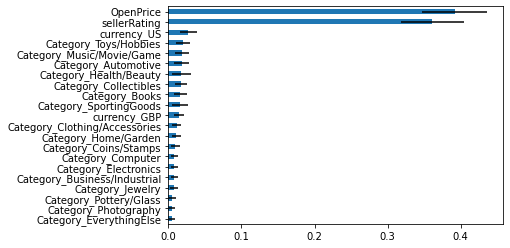

In [10]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

# variable (feature) importance plot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance', ascending=False)
print(df)

ax = df.sort_values(by='importance', ascending=True).plot(kind='barh',
                                                          xerr='std',
                                                          x='feature',
                                                          legend=False)
ax.set_ylabel('')
plt.show()

As we have understood, the `OpenPrice` and `sellerRating` are indeed the two best predictors.

Let's now plot a scatter plot using these two predictors as axes and the class `Competitive?` as the hue:

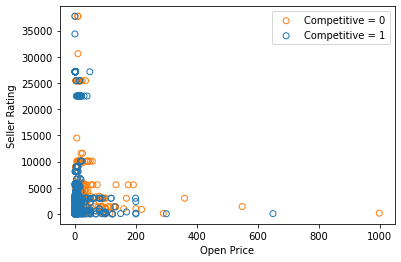

In [11]:
# plot first the data points for 'Competitive?' of 0 and then of 1
_, ax = plt.subplots()
for cat_value, color in [(0, "C1"), (1, "C0")]:
    subset_df = ebay_df[ebay_df["Competitive?"] == cat_value]
    ax.scatter(subset_df.OpenPrice, subset_df.sellerRating, color="none",
               edgecolor=color)
ax.set_xlabel("Open Price")
ax.set_ylabel("Seller Rating")
ax.legend(["Competitive = 0", "Competitive = 1"])

plt.show()

Changing the scale in a display can enhance the plot and illuminate relationships. The re-scaling removes this crowding and allows a better view of the linear relationship between the two log-scaled variables (indicating a log–log relationship).

Let's verify whether such relationship exists: 

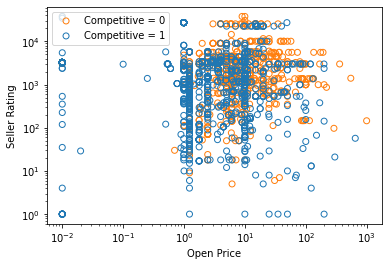

In [12]:
# plot first the data points for 'Competitive?' of 0 and then of 1
_, ax = plt.subplots()
for cat_value, color in [(0, "C1"), (1, "C0")]:
    subset_df = ebay_df[ebay_df["Competitive?"] == cat_value]
    ax.scatter(subset_df.OpenPrice, subset_df.sellerRating, color="none",
               edgecolor=color)
ax.set_xlabel("Open Price")
ax.set_ylabel("Seller Rating")
ax.legend(["Competitive = 0", "Competitive = 1"])
ax.set_xscale("log")
ax.set_yscale("log")

plt.show()

Even using log-log axes, it will be necessary a lot of splits to properly define each class using these two predictors. In other words, we can say that there aren't explicit variable values that do a good job separating these two classes.

The interesting thing in this example is that though the importance of these two predictors are higher compared to the others, it is still difficult to find a properly coordinate that discriminate each class.

**f.** Examine the lift chart and the confusion matrix for the tree. What can you say about the predictive performance of this model?

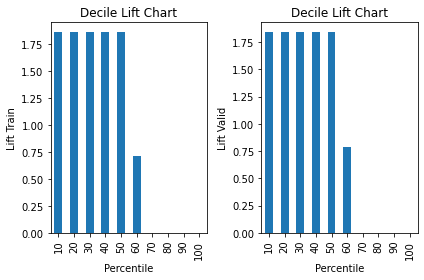

Confusion Matrix (Accuracy 0.7591)

       Prediction
Actual   0   1
     0 407 146
     1 139 491

Confusion Matrix (Accuracy 0.7199)

       Prediction
Actual   0   1
     0 246 107
     1 114 322


In [13]:
pred_train = pd.Series(class_tree.predict(train_X))
pred_train = pred_train.sort_values(ascending=False)

pred_valid = pd.Series(class_tree.predict(valid_X))
pred_valid = pred_valid.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)

ax = lift_chart(pred_train, ax=axes[0], label_bars=False)
ax.set_ylabel("Lift Train")

ax = lift_chart(pred_valid, ax=axes[1], label_bars=False)
ax.set_ylabel("Lift Valid")

plt.tight_layout()
plt.show()

# fine-tuned tree: training
classification_summary(train_y, class_tree.predict(train_X))

print()
# fine-tuned tree: validation
classification_summary(valid_y, class_tree.predict(valid_X))

The lift curve (only the  `Lift Valid` is important here, though the both are pretty much the same) tells us that there is an improvement of using the model when comparing to the benchmark rule, specially up to the 60th percentile. For the above percentiles there isn't any improvement using this model.

The confusion matrix gives us the overall error rate of the model:

<p>
$\text{err_rate}_{\text{train}} = \frac {407 + 491}{407 + 139 + 146 + 491} = 0.24$ <br />
$\text{err_rate}_{\text{valid}} = \frac {246 + 322}{246 + 114 + 107 + 322} = 0.28$
</p>

**g**. Based on this last tree, what can you conclude from these data about the chances of an auction obtaining at least two bids and its relationship to the auction settings set by the seller (duration, opening price, ending day, currency)? What would you recommend for a seller as the strategy that will most likely lead to a competitive auction?

To start with if an lower `OpenPrice` and invest into its `sellerRating`. However, starting with a lower `OpenPrice` only wouldn't be sufficient to an auction be competitive. If the seller has control over the currency, it would be better if it is on GBP (Great Britain pounds) rather than other currency. Besides, I would suggest to sell more book or sporting goods if the goal is to have competitive auctions.

**Predicting Prices of Used Cars (Regression Trees).** The file `ToyotaCorolla.csv` contains the data on used cars (Toyota Corolla) on sale during late summer of 2004 in the Netherlands. It has 1.436 records containing details on 38 attributes, including Price, Age, Kilometers, HP, and other specifications. The goal is to predict the price of a used Toyota Corolla based on its specifications.

    Age_-08_-04: 77
    KM: 117,000
    Fuel_Type: Petrol
    HP: 110
    Automatic: No
    Doors: 5
    Quarterly_Tax: 100
    Mfg_Guarantee: No
    Guarantee_Period: 3
    Airco: Yes
    Automatic_airco: No
    CD_Player: No
    Powered_Windows: No
    Sport_Model: No
    Tow_Bar: No

**Data Preprocessing.** Split the data into training (60%), and validation (40%) datasets.

In [14]:
toyota_df = pd.read_csv("../datasets/ToyotaCorolla.csv")

outcome = "Price"
predictors = ["Age_08_04", "KM", "Fuel_Type", "HP", "Automatic", "Doors", "Quarterly_Tax",
              "Mfr_Guarantee", "Guarantee_Period", "Airco", "Automatic_airco", "CD_Player",
              "Powered_Windows", "Sport_Model", "Tow_Bar"]

toyota_df[predictors].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age_08_04         1436 non-null   int64 
 1   KM                1436 non-null   int64 
 2   Fuel_Type         1436 non-null   object
 3   HP                1436 non-null   int64 
 4   Automatic         1436 non-null   int64 
 5   Doors             1436 non-null   int64 
 6   Quarterly_Tax     1436 non-null   int64 
 7   Mfr_Guarantee     1436 non-null   int64 
 8   Guarantee_Period  1436 non-null   int64 
 9   Airco             1436 non-null   int64 
 10  Automatic_airco   1436 non-null   int64 
 11  CD_Player         1436 non-null   int64 
 12  Powered_Windows   1436 non-null   int64 
 13  Sport_Model       1436 non-null   int64 
 14  Tow_Bar           1436 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 168.4+ KB


In [15]:
X = pd.get_dummies(toyota_df[predictors], drop_first=True)
y = toyota_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

**a.** Run a full-grown regression tree (RT) with outcome variable Price and predictors `Age_08_04`, `KM`, `Fuel_Type` (first convert to dummies), `HP`, `Automatic`, `Doors`, { `Quarterly_Tax`, `Mfr_Guarantee`, `Guarantee_Period`, `Airco`, `Automatic_airco`, `CD_Player`, `Powered_Windows`, `Sport_Model`, and `Tow_Bar`. Set random_state=1.

In [16]:
reg_tree = DecisionTreeRegressor(random_state=1)
reg_tree.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

    i. Which appear to be the three or four most important car specifications for
       predicting the car's price?
       
Let's see which car specifications are four most important car specifications (using regression tree `feature_importance` method)

             feature  importance
0          Age_08_04    0.844867
2                 HP    0.053789
1                 KM    0.049601
9    Automatic_airco    0.013358
5      Quarterly_Tax    0.006769
11   Powered_Windows    0.005221
4              Doors    0.004864
8              Airco    0.004727
12       Sport_Model    0.004459
6      Mfr_Guarantee    0.003714
7   Guarantee_Period    0.002385
13           Tow_Bar    0.002345
10         CD_Player    0.002088
3          Automatic    0.001334
15  Fuel_Type_Petrol    0.000470
14  Fuel_Type_Diesel    0.000011


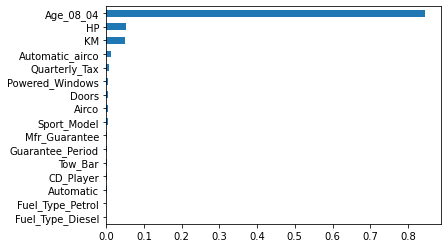

In [17]:
# variable (feature) importance plot
importances = reg_tree.feature_importances_

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances})
df = df.sort_values('importance', ascending=False)
print(df)

ax = df.sort_values(by='importance', ascending=True).plot(kind='barh',
                                                          x='feature',
                                                          legend=False)
ax.set_ylabel('')
plt.show()

Accordingly to this tree, the four most important car specifications are:

- Age
- Horse Power
- Mileage
- Automatic Air

    ii. Compare the prediction errors of the training and validation sets by
       examining their RMS error and by plotting the two boxplots. How does the predictive
       performance of the validation set compare to the training set? Why does this occur?

In [18]:
# evaluate performance
# training
print("Training set:")
regression_summary(train_y, reg_tree.predict(train_X))
#validation
print("Validation set:")
regression_summary(valid_y, reg_tree.predict(valid_X))

Training set:

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : 0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000
Validation set:

Regression statistics

                      Mean Error (ME) : 76.6557
       Root Mean Squared Error (RMSE) : 1492.3365
            Mean Absolute Error (MAE) : 1152.4852
          Mean Percentage Error (MPE) : -0.3363
Mean Absolute Percentage Error (MAPE) : 11.3783


The prediction errors for the training set is zero (for all metrics), while the prediction errors for the validation set not. The RMSE for the validation set is 1492. This happened because we run a full-growth tree that overfitted the training dataset completely (this is one danger in growing deep trees on the training data).

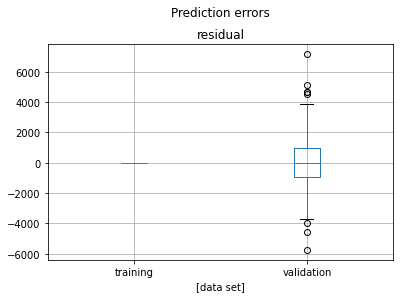

In [19]:
pred_error_train = pd.DataFrame({
    "residual": train_y - reg_tree.predict(train_X),
    "data set": "training"})

pred_error_valid = pd.DataFrame({
    "residual": valid_y - reg_tree.predict(valid_X),
    "data set": "validation"})

boxdata_df = pred_error_train.append(pred_error_valid, ignore_index=True)

fig, ax = plt.subplots()
boxdata_df.boxplot(ax=ax, by="data set")
plt.suptitle("Prediction errors")
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

    iii. How might we achieve better validation predictive performance at
         the expense of training performance?

One danger in growing deep trees on the training data is overfitting. If we look at the overall error at the various sizes of the tree, it is expected to decrease as the number of terminal nodes grows until the point of overfitting. Of course, for the training data the overall error decreases more and more until it is zero at the maximum level of the tree. However, for new data, the overall error is expected to decrease until the point where the tree fully models the relationship between class and the predictors. After that, the tree starts to model the noise in the training set, and we expect the overall error for the validation set to start increasing.

One can think of different criteria for stopping the tree growth before it starts overfitting the data. Examples are tree depth (i.e., number of splits), minimum number of records in a terminal node, and minimum reduction in impurity.

Another scenario is the following. If we use the training set to find the tree with the lowest error among all the trees in the searched range, measuring accuracy on that same training data, then we will be overfitting the training data. If we use the validation set to measure accuracy, then, with the numerous grid search trials, we will be overfitting the validation data!

Therefore, a solution is to use cross-validation on the training set, and, after settling on the best tree, use that tree with the validation data to evaluate likely actual performance with new data. This will help detect and avoid possible overfitting.

    iv. Create a smaller tree by using GridSearchCV() with cv = 5 to find a
        fine-tuned tree. Compared to the full-grown tree, what is the predictive
        performance on the validation set?

In [20]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60, 80, 100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]}
    
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5,
                           n_jobs=-1) # n_jobs = -1 will utilize all available CPUs
grid_search.fit(train_X, train_y)
print('Initial score: ', grid_search.best_score_)
print('Initial parameters: ', grid_search.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), # 14 values,
    'min_samples_split': list(range(10, 22)), # 11 values,
    'min_impurity_decrease': [0.0009, 0.001, 0.00111], # 3 values
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5,
                           n_jobs=-1)
grid_search.fit(train_X, train_y)
print('Improved score: ', grid_search.best_score_)
print('Improved parameters: ', grid_search.best_params_)

best_class_tree = grid_search.best_estimator_

Initial score:  0.8636094229273947
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved score:  0.8673184724542766
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.0009, 'min_samples_split': 21}


In [21]:
best_class_tree = grid_search.best_estimator_
# fine-tuned tree: training
regression_summary(train_y, best_class_tree.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1100.9381
            Mean Absolute Error (MAE) : 799.4101
          Mean Percentage Error (MPE) : -1.0081
Mean Absolute Percentage Error (MAPE) : 7.6852


Comparing the RMSE of the full-growth regression tree (RMSE = 1492.3365) the cross validated, fine tuned, tree has better results (RMSE = 1100.9381).

**b.** Let us see the effect of turning the price variable into a categorical variable. First, create a new variable that categorizes price into 20 bins. Now repartition the data keeping `Binned_Price`instead of `Price`. Run a classification tree with the same set of input variables as in the RT, and with `Binned_Price` as the output variable. As in the less deep regression tree, create a smaller tree by using `GridSearchCV()` with `cv` = 5 to find a fine-tuned tree.

    i. Compare the smaller tree generated by the CT with the smaller tree generated by RT.
       Are they different? (Look at structure, the top predictors, size of tree, etc.).
       Why?
    ii. Predict the price, using the smaller RT and CT, of a used Toyota Corolla with the
        specifications listed.
    iii. Compare the predictions in terms of the predictors that were used, the
         magnitude of the difference between the two predictions, and the advantages
         and disadvantages of the two methods.